In [5]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch

In [6]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-esg',num_labels=4)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-esg')

# 检查是否有可用的 GPU
device = 0 if torch.cuda.is_available() else -1

nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer,device=device)

d:\anaconda3\envs\esg\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
#测试pipline
result = nlp('scope 1 - direct greenhouse gas emissions during fy2022, the three vessels owned by the group were virtually leased out throughout the whole of fy2022, and as the group did not own any vehicles, the group’s operations did not produce any direct greenhouse gas emissions.')
#print(result)

[{'label': 'Environmental', 'score': 0.992522656917572}]


In [1]:
# 打开并读取整个文件
with open("..\data\Courage Investment Group Limited_report.txt", "r", encoding="utf-8") as file:
    text = file.readlines()
#print(text)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lijin\AppData\Local\Temp\ipykernel_17824\2894444720.py:2: SyntaxWarning: invalid escape sequence '\d'
  with open("..\data\Courage Investment Group Limited_report.txt", "r", encoding="utf-8") as file:


In [55]:
results = []

#设置最大文本长度
max_text_length = 510

for t in text:
    t = t.strip()
    if len(t) > 512:
        result = nlp(t[:max_text_length])
    else:
        result = nlp(t)
    results.append(result)

In [21]:
#查看result
#results[2]

[{'label': 'Social', 'score': 0.48891350626945496}]

In [60]:
k = [0,0,0]
for i in range(len(results)):
    if results[i][0].get('label') != 'None':
        #得分0.9以上个数
        if results[i][0].get('score') > 0.9:
            k[0] += 1
        #得分0.8以上个数
        if results[i][0].get('score') > 0.8:
            k[1] += 1
        #所有非None类句子个数
        k[2] += 1
print(k)

[213, 282, 412]


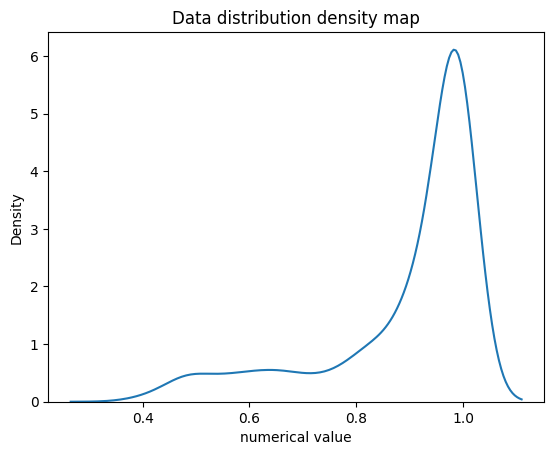

In [53]:
import seaborn as sns

#展示分数分布
s = [i[0].get('score') for i in results]

sns.kdeplot(s)
plt.xlabel('numerical value')
plt.title('Data distribution density map')
plt.show()

In [32]:
#查看对应文字
#text[487]

'this was mainly due to an increase in business activities.\n'

In [52]:
r = []
for i in range(len(results)):
    if results[i][0].get('label') != 'None' and results[i][0].get('score') > 0.9:
        r.append(text[i])

In [59]:
# 打开文件进行写入
with open('../output/Courage Investment Group Limited_report_class.txt', 'w', encoding='utf-8') as file:
    for sublist in r:
        # 假设每个子列表里只有一段文本，取第一个元素
        file.write(sublist + '\n')  # 添加换行符，方便段落间隔
print(f'文本已经成功写入')

文本已经成功写入


In [ ]:
# Load model directly
# 本地内存不够不要尝试~

# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import numpy as np
# import torch

# tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-esg")
# model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-esg")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# max_length = 510
# inputs = tokenizer(text, return_tensors="pt", max_length=max_length, truncation= True, padding=True)
# inputs = {key: value.to(device) for key, value in inputs.items()}

# outputs = model(**inputs)
# logits = outputs.logits
# predictions = torch.argmax(logits, dim=-1)
# print(predictions)


In [ ]:
def filter_txt(input_file_path, max = 510, plot = False):
    try:
        # 获取输入文件的目录、文件名和扩展名
        file_dir, file_name = os.path.split(input_file_path)
        file_base, file_ext = os.path.splitext(file_name)
        
        # 创建输出文件的路径，文件名加 `_filtered`
        output_file_path = os.path.join(file_dir, f"{file_base}_filtered{file_ext}")
        
        # 打开并读取整个文件
        with open(input_file_path, "r", encoding="utf-8") as file:
            text = file.readlines()
        
        results = []

        #设置最大文本长度
        max_text_length = max

        for t in text:
            t = t.strip()
            if len(t) > 512:
                result = nlp(t[:max_text_length])
            else:
                result = nlp(t)
            results.append(result)
        
        if plot == True:
            #展示分数分布
            s = [i[0].get('score') for i in results]

            sns.kdeplot(s)
            plt.xlabel('numerical value')
            plt.title('Data distribution density map')
            plt.show()
        
        r = []
        for i in range(len(results)):
            if results[i][0].get('label') != 'None' and results[i][0].get('score') > 0.9:
                r.append(text[i])
                
        # 打开文件进行写入
        with open(output_file_path, 'w', encoding='utf-8') as file:
            for sublist in r:
                # 假设每个子列表里只有一段文本，取第一个元素
                # file.write(sublist + '\n')  # 添加换行符，方便段落间隔
                file.write(sublist) #不要换行符，方便操作
        print(f'文本已经成功写入 {output_file_path}')
    except Exception as e:
        print(f'发生错误: {e}')